# Project 5: Application - Twitter data

## Part 1: Popularity Prediction

### 1. A first look at the data

### Question 1 & 2: Report and Plot

In [1]:
# NOTE: http://pytz.sourceforge.net/
import pytz
# NOTE: https://www.w3schools.com/python/python_json.asp
import json
# NOTE: https://docs.python.org/3/library/datetime.html
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# load files and report for Question 1
def readfile_p1(file_name):
    # Read file
    time_list = []
    num_retweets = []
    num_followers = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
    file.close()

    # Process datetime for event counting
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    # number of tweets
    date_df['num_tweets'] = 1
    date_df = date_df.resample('H').count()
    
    return date_df, num_followers, num_retweets

#### Report of gohawks

In [3]:
# tweets_#gohawks.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#gohawks.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))

Average number of tweets: 292.09326424870466
Average number of followers: 2217.9237355281984
Average number of retweet: 2.0132093991319877


#### Report of gopatriots

In [4]:
# tweets_#gopatriots.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#gopatriots.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))

Average number of tweets: 40.888695652173915
Average number of followers: 1427.2526051635405
Average number of retweet: 1.4081919101697078


#### Report of nfl

Average number of tweets: 396.97103918228277
Average number of followers: 4662.37544523693
Average number of retweet: 1.5344602655543254
Average number of tweets: 396.97103918228277
Average number of followers: 4662.37544523693
Average number of retweet: 1.5344602655543254


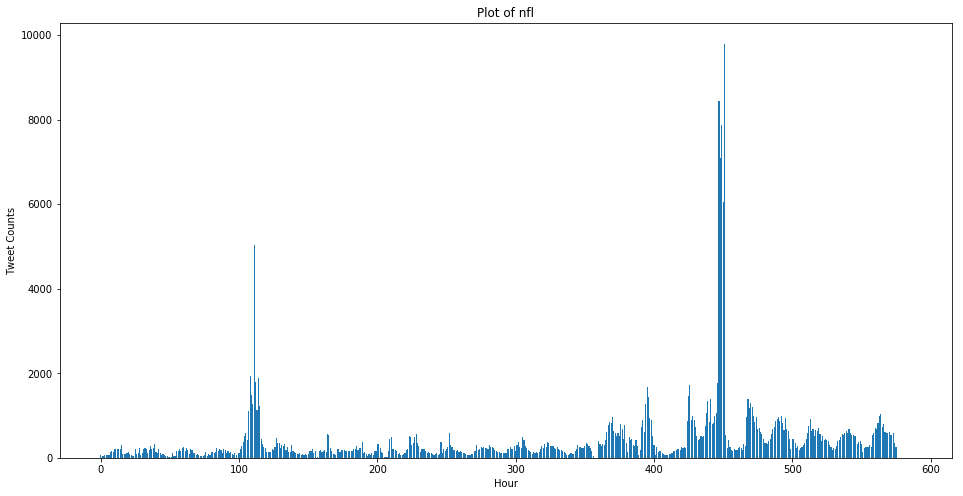

In [0]:
# tweets_#nfl.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#nfl.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))
# plot
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))
tweet_counts = pd.to_numeric(date_df.unstack()).values
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(tweet_counts)),tweet_counts)
plt.title('Plot of nfl')
plt.xlabel("Hour")
plt.ylabel("Tweet Counts")
plt.show()

#### Report of patriots

In [0]:
# tweets_#patriots.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#patriots.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))

Average number of tweets: 750.6320272572402
Average number of followers: 3280.4635616550277
Average number of retweet: 1.7852871288476946


#### Report of sb49

In [0]:
# tweets_#sb49.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#sb49.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))

Average number of tweets: 1275.5557461406518
Average number of followers: 10374.160292019487
Average number of retweet: 2.52713444111402


#### Report of superbowl

Average number of tweets: 2067.824531516184
Average number of followers: 8814.96799424623
Average number of retweet: 2.3911895819207736
Average number of tweets: 2067.824531516184
Average number of followers: 8814.96799424623
Average number of retweet: 2.3911895819207736


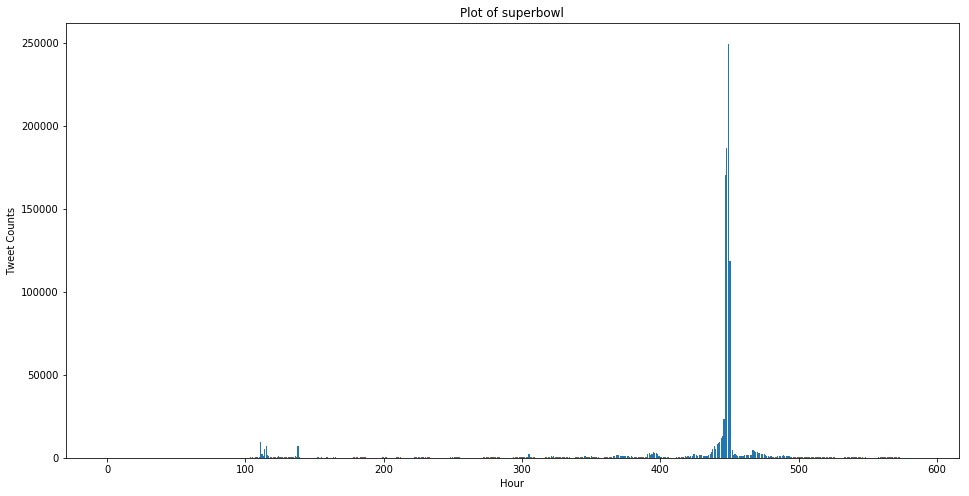

In [0]:
# tweets_#superbowl.txt
date_df, num_followers, num_retweets = readfile_p1('tweets_#superbowl.txt')
# report
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))
# plot
print('Average number of tweets: {}'.format(date_df['num_tweets'].mean()))
print('Average number of followers: {}'.format(np.mean(num_followers)))
print('Average number of retweet: {}'.format(np.mean(num_retweets)))
tweet_counts = pd.to_numeric(date_df.unstack()).values
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(tweet_counts)),tweet_counts)
plt.title('Plot of superbowl')
plt.xlabel("Hour")
plt.ylabel("Tweet Counts")
plt.show()

### 2. Linear regression

In [0]:
# load files and report for Part 2
# NOTE: https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p2(file_name):
    # Read file
    time_list = []
    num_retweets = []
    num_followers = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
    file.close()

    # Process datetime for event counting
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)

    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets

    # count events per feature
    # features: 
    #   total number of tweets, total number of followers, total number of retweets
    date_df_out = date_df.resample('H').sum()
    #   max number of followers, time of the day
    max_num_followers = date_df['num_followers'].resample('H').max()
    date_df_out['max_num_follower'] = max_num_followers
    date_df_out['time'] = date_df_out.index.hour
    return date_df_out

In [0]:
# NOTE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# OLS
def OLS_p2(date_df_out):
    X = date_df_out.iloc[:-1]
    y = date_df_out['num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)
    results= sm.OLS(y, X).fit()

    # RMSE and R2 measure
    r2 = r2_score(y, results.fittedvalues)
    mse = mean_squared_error(y, results.fittedvalues)

    # significance of feature ()
    pvalues_index_list = []
    pvalues_list = []
    pvalues = results.pvalues
    top_index = np.argsort(pvalues)
    for i in top_index:
        pvalues_index_list.append(pvalues.tolist().index(pvalues[i])+1)
        pvalues_list.append(pvalues[i])
    return results, r2, mse, pvalues_index_list, pvalues_list

#### Report of gohawks

In [0]:
# 'tweets_#gohawks.txt'
date_df_out = readfile_p2('tweets_#gohawks.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           7.10e-85
Time:                        20:53:49   Log-Likelihood:                -4733.9
No. Observations:                 578   AIC:                             9478.
Df Residuals:                     573   BIC:                             9500.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2856      0.164      7.843      0.0

#### Report of gopatriots

In [0]:
# tweets_#gopatriots.txt
date_df_out = readfile_p2('tweets_#gopatriots.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     199.9
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          9.65e-123
Time:                        20:53:50   Log-Likelihood:                -3749.3
No. Observations:                 574   AIC:                             7509.
Df Residuals:                     569   BIC:                             7530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3081      0.284      1.083      0.2

#### Report of nfl

In [0]:
# 'tweets_#nfl.txt'
date_df_out = readfile_p2('tweets_#nfl.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     217.8
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          1.23e-130
Time:                        20:54:03   Log-Likelihood:                -4500.0
No. Observations:                 586   AIC:                             9010.
Df Residuals:                     581   BIC:                             9032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6317      0.134      4.718      0.0

#### Report of patriots

In [0]:
# 'tweets_#patriots.txt'
date_df_out = readfile_p2('tweets_#patriots.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          5.98e-141
Time:                        20:54:25   Log-Likelihood:                -5361.9
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     581   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9148      0.071     12.943      0.0

#### Report of sb49

In [0]:
# 'tweets_#sb49.txt'
date_df_out = readfile_p2('tweets_#sb49.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     486.4
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          3.24e-204
Time:                        20:55:03   Log-Likelihood:                -5656.6
No. Observations:                 582   AIC:                         1.132e+04
Df Residuals:                     577   BIC:                         1.134e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1374      0.087     13.042      0.0

#### Report of superbowl

In [0]:
# 'tweets_#superbowl.txt'
date_df_out = readfile_p2('tweets_#superbowl.txt')
results, r2, mse, pvalues_index_list, pvalues_list = OLS_p2(date_df_out)
# report
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Top features: X{}'.format(pvalues_index_list))
print('Sorted p-value: {}'.format(pvalues_list))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     473.8
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          2.80e-202
Time:                        20:56:05   Log-Likelihood:                -6039.9
No. Observations:                 586   AIC:                         1.209e+04
Df Residuals:                     581   BIC:                         1.211e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2765      0.080     28.559      0.0

### 3. Feature analysis

### Question 4 & 5: Design a regression model and Plot top 3 features

In [0]:
# load files and report for Part 3
# NOTE: https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p3(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    tot_num_tweets = date_df['num_tweets'].resample('H').sum()
    tot_num_followers = date_df['num_followers'].resample('H').sum()
    max_num_followers = date_df['num_followers'].resample('H').max()
    tot_num_retweets = date_df['num_retweets'].resample('H').sum()
    tot_num_replies = date_df['num_replies'].resample('H').sum()
    max_num_replies = date_df['num_replies'].resample('H').max()
    tot_num_impressions = date_df['num_impressions'].resample('H').sum()
    max_num_impressions = date_df['num_impressions'].resample('H').max()
    tot_num_favourites = date_df['num_favourites'].resample('H').sum()
    max_num_favourites = date_df['num_favourites'].resample('H').max()
    tot_rank_score = date_df['rank_score'].resample('H').sum()
    max_rank_score = date_df['rank_score'].resample('H').max()
    tot_count_hashtag = date_df['count_hashtag'].resample('H').sum()
    max_count_hashtag = date_df['count_hashtag'].resample('H').max()
    tot_mention_counts = date_df['mention_counts'].resample('H').sum()
    max_mention_counts = date_df['mention_counts'].resample('H').max()
    tot_url_counts = date_df['url_counts'].resample('H').sum()
    max_url_counts = date_df['url_counts'].resample('H').max()
    tot_author_name = date_df['author_name'].resample('H').apply(lambda x: len(x.unique()))
    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)            # x1
    tot_num_followers.rename('tot_num_followers',inplace=True)      # x2
    max_num_followers.rename('max_num_followers',inplace=True)      # x3
    tot_num_retweets.rename('tot_num_retweets',inplace=True)        # x4
    tot_num_replies.rename('tot_num_replies',inplace=True)          # x5
    max_num_replies.rename('max_num_replies',inplace=True)          # x6
    tot_num_impressions.rename('tot_num_impressions',inplace=True)  # x7
    max_num_impressions.rename('max_num_impressions',inplace=True)  # x8
    tot_num_favourites.rename('tot_num_favourites',inplace=True)    # x9
    max_num_favourites.rename('max_num_favourites',inplace=True)    # x10
    tot_rank_score.rename('tot_rank_score',inplace=True)            # x11
    max_rank_score.rename('max_rank_score',inplace=True)            # x12
    tot_count_hashtag.rename('tot_count_hashtag',inplace=True)      # x13
    max_count_hashtag.rename('max_count_hashtag',inplace=True)      # x14
    tot_mention_counts.rename('tot_mention_counts',inplace=True)    # x15
    max_mention_counts.rename('max_mention_counts',inplace=True)    # x16
    tot_url_counts.rename('tot_url_counts',inplace=True)            # x17
    max_url_counts.rename('max_url_counts',inplace=True)            # x18
    tot_author_name.rename('tot_author_name',inplace=True)          # x19
    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features
    features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour                    # 20
    return date_df_out

In [0]:
# NOTE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# OLS
def OLS_p3(date_df_out):
    X = date_df_out.iloc[:-1]
    y = date_df_out['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)
    results = sm.OLS(y, X).fit()
    # RMSE and R2 measure
    r2 = r2_score(y, results.fittedvalues)
    mse = mean_squared_error(y, results.fittedvalues)
    # top 3 features
    pvalues_index_list = []
    pvalues_list = []
    X_new = []
    pvalues = results.pvalues
    top_index = np.argsort(pvalues)[:3]
    for i in top_index:
        pvalues_index_list.append(pvalues.tolist().index(pvalues[i])+1)
        pvalues_list.append(pvalues[i])
        X_new.append(X.T[i])
    return results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues

In [0]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    #plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

#### Report of gohawks

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     72.61
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          9.09e-141
Time:                        20:56:15   Log-Likelihood:                -4566.2
No. Observations:                 578   AIC:                             9172.
Df Residuals:                     558   BIC:                             9260.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -64.3885      4.536    -14.196      0.0

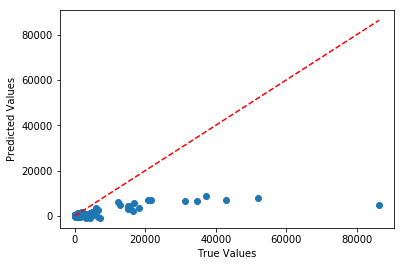

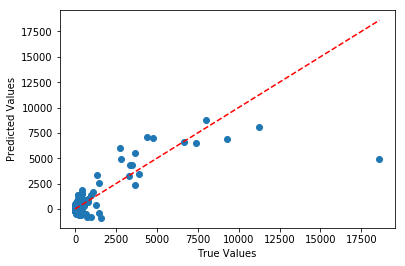

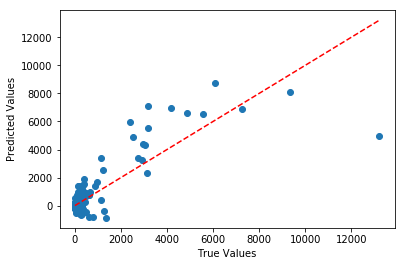

In [0]:
# 'tweets_#gohawks.txt'
date_df_out = readfile_p3('tweets_#gohawks.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

#### Report of gopatriots

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     330.1
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          2.51e-292
Time:                        20:56:16   Log-Likelihood:                -3306.1
No. Observations:                 574   AIC:                             6652.
Df Residuals:                     554   BIC:                             6739.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -28.9274      3.324     -8.704      0.0

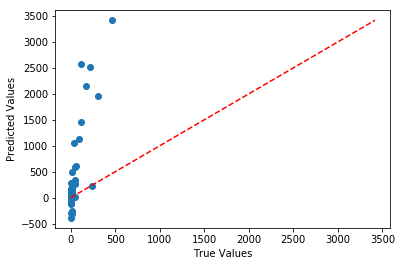

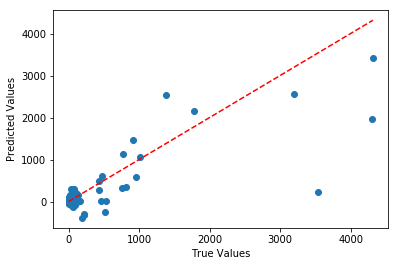

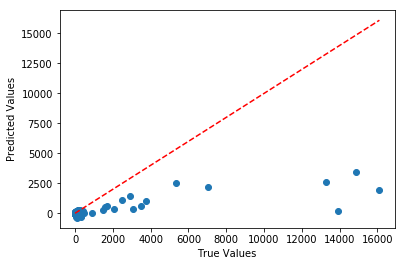

In [0]:
# 'tweets_#gopatriots.txt'
date_df_out = readfile_p3('tweets_#gopatriots.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

#### Report of nfl

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          8.67e-191
Time:                        20:56:30   Log-Likelihood:                -4318.6
No. Observations:                 586   AIC:                             8677.
Df Residuals:                     566   BIC:                             8765.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4264      1.462     -1.659      0.0

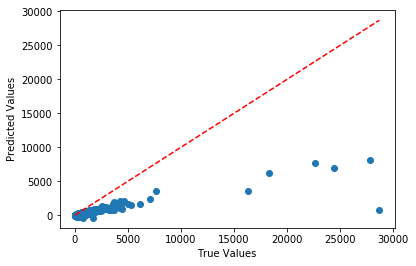

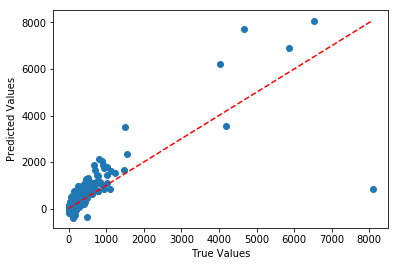

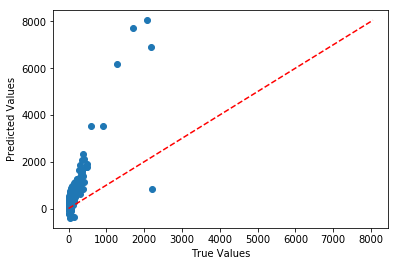

In [0]:
# 'tweets_#nfl.txt'
date_df_out = readfile_p3('tweets_#nfl.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

#### Report of patriots

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     151.5
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          4.24e-212
Time:                        20:56:56   Log-Likelihood:                -5153.5
No. Observations:                 586   AIC:                         1.035e+04
Df Residuals:                     566   BIC:                         1.043e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -76.0731      4.673    -16.280      0.0

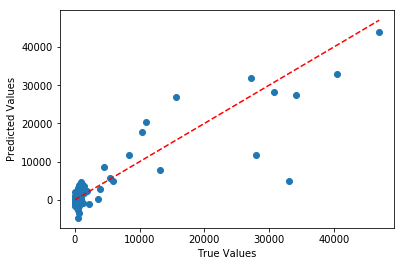

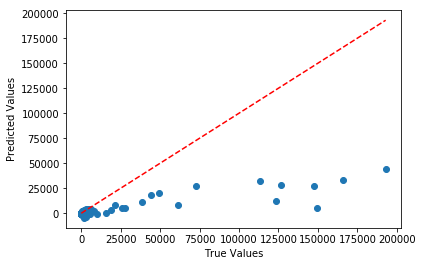

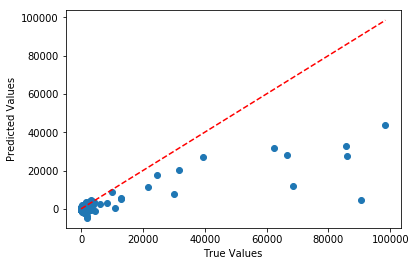

In [0]:
# 'tweets_#patriots.txt'
date_df_out = readfile_p3('tweets_#patriots.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

#### Report of sb49

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     201.6
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          4.43e-241
Time:                        20:57:38   Log-Likelihood:                -5525.8
No. Observations:                 582   AIC:                         1.109e+04
Df Residuals:                     562   BIC:                         1.118e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -118.6473      9.710    -12.219      0.0

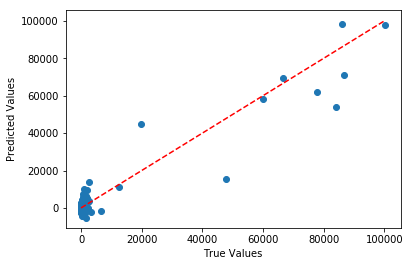

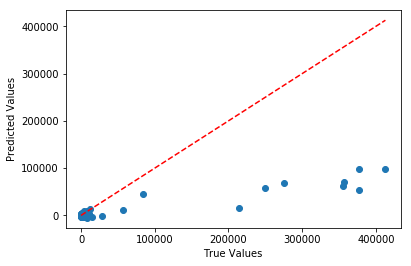

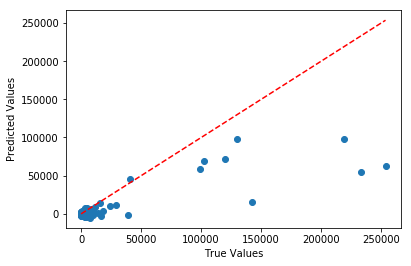

In [0]:
# 'tweets_#sb49.txt'
date_df_out = readfile_p3('tweets_#sb49.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

#### Report of superbowl

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     263.3
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          3.28e-271
Time:                        20:58:50   Log-Likelihood:                -5832.6
No. Observations:                 586   AIC:                         1.171e+04
Df Residuals:                     566   BIC:                         1.179e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -27.7170      7.671     -3.613      0.0

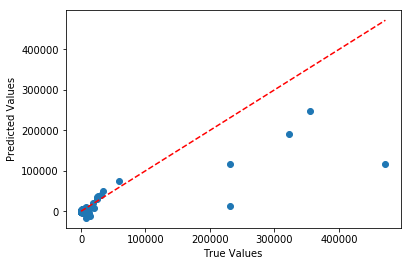

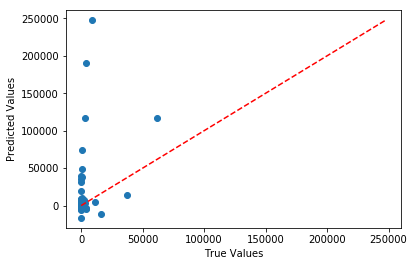

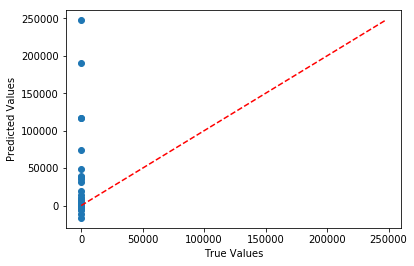

In [0]:
# 'tweets_#superbowl.txt'
date_df_out = readfile_p3('tweets_#superbowl.txt')
results, r2, mse, pvalues_index_list, pvalues_list, X_new, pvalues = OLS_p3(date_df_out)
print(results.summary())
print(' ')
print('R-squared measure: {}'.format(r2))
print('MSE score: {}'.format(mse))
print('Signifiance of features: X{}'.format(pvalues))
print('Top 3 features: {}'.format(pvalues_index_list))
print('Lowest 3 p-value: {}'.format(pvalues_list))
for i in np.arange(3):
    plotPred(X_new[i],results.fittedvalues)

### 4. Piece-wise linear regression

### Question 6: report 3 model for each file

In [2]:
# load files and report for Part 4
# NOTE: https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
def readfile_p4(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name
    return date_df

In [3]:
# NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
def create_features(date_df, period):
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    tot_num_tweets = date_df['num_tweets'].resample(period).sum()
    tot_num_followers = date_df['num_followers'].resample(period).sum()
    max_num_followers = date_df['num_followers'].resample(period).max()
    tot_num_retweets = date_df['num_retweets'].resample(period).sum()
    tot_num_replies = date_df['num_replies'].resample(period).sum()
    max_num_replies = date_df['num_replies'].resample(period).max()
    tot_num_impressions = date_df['num_impressions'].resample(period).sum()
    max_num_impressions = date_df['num_impressions'].resample(period).max()
    tot_num_favourites = date_df['num_favourites'].resample(period).sum()
    max_num_favourites = date_df['num_favourites'].resample(period).max()
    tot_rank_score = date_df['rank_score'].resample(period).sum()
    max_rank_score = date_df['rank_score'].resample(period).max()
    tot_count_hashtag = date_df['count_hashtag'].resample(period).sum()
    max_count_hashtag = date_df['count_hashtag'].resample(period).max()
    tot_mention_counts = date_df['mention_counts'].resample(period).sum()
    max_mention_counts = date_df['mention_counts'].resample(period).max()
    tot_url_counts = date_df['url_counts'].resample(period).sum()
    max_url_counts = date_df['url_counts'].resample(period).max()
    tot_author_name = date_df['author_name'].resample(period).apply(lambda x: len(x.unique()))
    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)            # x1
    tot_num_followers.rename('tot_num_followers',inplace=True)      # x2
    max_num_followers.rename('max_num_followers',inplace=True)      # x3
    tot_num_retweets.rename('tot_num_retweets',inplace=True)        # x4
    tot_num_replies.rename('tot_num_replies',inplace=True)          # x5
    max_num_replies.rename('max_num_replies',inplace=True)          # x6
    tot_num_impressions.rename('tot_num_impressions',inplace=True)  # x7
    max_num_impressions.rename('max_num_impressions',inplace=True)  # x8
    tot_num_favourites.rename('tot_num_favourites',inplace=True)    # x9
    max_num_favourites.rename('max_num_favourites',inplace=True)    # x10
    tot_rank_score.rename('tot_rank_score',inplace=True)            # x11
    max_rank_score.rename('max_rank_score',inplace=True)            # x12
    tot_count_hashtag.rename('tot_count_hashtag',inplace=True)      # x13
    max_count_hashtag.rename('max_count_hashtag',inplace=True)      # x14
    tot_mention_counts.rename('tot_mention_counts',inplace=True)    # x15
    max_mention_counts.rename('max_mention_counts',inplace=True)    # x16
    tot_url_counts.rename('tot_url_counts',inplace=True)            # x17
    max_url_counts.rename('max_url_counts',inplace=True)            # x18
    tot_author_name.rename('tot_author_name',inplace=True)          # x19
    # time                                                          # x20
    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features - H
    features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour                    # 20
    return date_df_out

In [7]:
# NOTE: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
def splite_df(date_df):
    # create three dataset
    time_1 = '2015-02-01 08:00:00'
    time_2 = '2015-02-01 20:00:00'
    # dataset before 2/1 8:00am IN 1h (H)
    date_df_1 = create_features(date_df, 'H')
    date_df_1 = date_df_1.iloc[date_df_1.index<time_1,:]
    # dataset after 2/1 8:00pm IN 1h (H)
    date_df_3 = create_features(date_df, 'H')
    date_df_3 = date_df_3.iloc[date_df_3.index>time_2,:]
    # dataset between 2/1 8:00am - 8:00pm IN 5min (5T)
    date_df_2 = create_features(date_df, '5T')
    date_df_2 = date_df_2.iloc[date_df_2.index>=time_1,:]
    date_df_2 = date_df_2.iloc[date_df_2.index<=time_2,:] 
    # output dataset
    date_df_out_list = []
    date_df_out_list.append(date_df_1)
    date_df_out_list.append(date_df_2)
    date_df_out_list.append(date_df_3)
    return date_df_out_list

In [8]:
# NOTE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# OLS
def OLS_p4(date_df_out):
    for i in np.arange(3):
        X = date_df_out[i].iloc[:-1]
        y = date_df_out[i]['tot_num_tweets'][1:]
        X = np.nan_to_num(X)
        y = np.nan_to_num(y)
        results = sm.OLS(y, X).fit()
        # RMSE and R2 measure
        r2 = r2_score(y, results.fittedvalues)
        mse = mean_squared_error(y, results.fittedvalues)
        # report
        print('#'*30,'Report of period',i+1,'#'*30)
        print(results.summary())
        print(' ')
        print('R-squared measure: {}'.format(r2))
        print('MSE score: {}'.format(mse))
        print(' ')

#### Report of gohawks

In [0]:
# tweets_#gohawks.txt
date_df = readfile_p4('tweets_#gohawks.txt')
date_df_out_gohawks = splite_df(date_df)
OLS_p4(date_df_out_gohawks)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     57.94
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          3.80e-107
Time:                        17:54:10   Log-Likelihood:                -3383.2
No. Observations:                 439   AIC:                             6806.
Df Residuals:                     419   BIC:                             6888.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Report of gopatriots

In [0]:
# tweets_#gopatriots.txt
date_df = readfile_p4('tweets_#gopatriots.txt')
date_df_out_gopatriots = splite_df(date_df)
OLS_p4(date_df_out_gopatriots)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     76.30
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          9.07e-126
Time:                        17:54:12   Log-Likelihood:                -2116.4
No. Observations:                 438   AIC:                             4273.
Df Residuals:                     418   BIC:                             4354.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Report of nfl

In [0]:
# tweets_#nfl.txt
date_df = readfile_p4('tweets_#nfl.txt')
date_df_out_nfl = splite_df(date_df)
OLS_p4(date_df_out_nfl)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     57.65
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          8.14e-107
Time:                        17:54:28   Log-Likelihood:                -3023.5
No. Observations:                 439   AIC:                             6087.
Df Residuals:                     419   BIC:                             6169.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Report of patriots

In [0]:
# tweets_#patriots.txt
date_df = readfile_p4('tweets_#patriots.txt')
date_df_out_patriots = splite_df(date_df)
OLS_p4(date_df_out_patriots)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     46.85
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.38e-93
Time:                        17:54:57   Log-Likelihood:                -3368.7
No. Observations:                 439   AIC:                             6777.
Df Residuals:                     419   BIC:                             6859.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Report of sb49

In [0]:
# tweets_#sb49.txt
date_df = readfile_p4('tweets_#sb49.txt')
date_df_out_sb49 = splite_df(date_df)
OLS_p4(date_df_out_sb49)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     258.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          6.58e-220
Time:                        17:55:45   Log-Likelihood:                -2449.5
No. Observations:                 435   AIC:                             4939.
Df Residuals:                     415   BIC:                             5021.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Report of superbowl

In [0]:
# tweets_#superbowl.txt
date_df = readfile_p4('tweets_#superbowl.txt')
date_df_out_superbowl = splite_df(date_df)
OLS_p4(date_df_out_superbowl)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     31.13
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           3.75e-70
Time:                        17:57:03   Log-Likelihood:                -3467.6
No. Observations:                 439   AIC:                             6975.
Df Residuals:                     419   BIC:                             7057.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Question 7: aggregate the data

In [0]:
# aggregate
agg_date_df_out_list = []
def agg_features(feature,i):
    feature_df = date_df_out_gohawks[i][feature] + date_df_out_gopatriots[i][feature]\
    + date_df_out_nfl[i][feature] + date_df_out_patriots[i][feature]\
    + date_df_out_sb49[i][feature] + date_df_out_superbowl[i][feature]
    return feature_df

for i in np.arange(3):
    tot_num_tweets = agg_features('tot_num_tweets',i)
    tot_num_followers = agg_features('tot_num_followers',i)
    max_num_followers = agg_features('max_num_followers',i)
    tot_num_retweets = agg_features('tot_num_retweets',i)
    tot_num_replies = agg_features('tot_num_replies',i)
    max_num_replies = agg_features('max_num_replies',i)
    tot_num_impressions = agg_features('tot_num_impressions',i)
    max_num_impressions = agg_features('max_num_impressions',i)
    tot_num_favourites = agg_features('tot_num_favourites',i)
    max_num_favourites = agg_features('max_num_favourites',i)
    tot_rank_score = agg_features('tot_rank_score',i)
    max_rank_score = agg_features('max_rank_score',i)
    tot_count_hashtag = agg_features('tot_count_hashtag',i)
    max_count_hashtag = agg_features('max_count_hashtag',i)
    tot_mention_counts = agg_features('tot_mention_counts',i)
    max_mention_counts = agg_features('max_mention_counts',i)
    tot_url_counts = agg_features('tot_url_counts',i)
    max_url_counts = agg_features('max_url_counts',i)
    tot_author_name = agg_features('tot_author_name',i)
    time = agg_features('time',i)
    # new dataframe
    features = [tot_num_tweets,
                   tot_num_followers, max_num_followers,
                   tot_num_retweets,
                   tot_num_replies, max_num_replies,
                   tot_num_impressions, max_num_impressions,
                   tot_num_favourites, max_num_favourites,
                   tot_rank_score, max_rank_score,
                   tot_count_hashtag, max_count_hashtag,
                   tot_mention_counts, max_mention_counts,
                   tot_url_counts, max_url_counts,
                   tot_author_name, time]
    agg_date_df_out = pd.concat(features,axis=1)
    agg_date_df_out_list.append(agg_date_df_out)

In [0]:
OLS_p4(agg_date_df_out_list)

############################## Report of period 1 ##############################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     31.44
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.09e-70
Time:                        17:57:43   Log-Likelihood:                -3945.8
No. Observations:                 439   AIC:                             7932.
Df Residuals:                     419   BIC:                             8013.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Question 8 & 9 aggregate the data with out time-period

In [5]:
# tweets_#gohawks.txt
print('tweets_#gohawks.txt')
date_df = readfile_p4('tweets_#gohawks.txt')
date_df_out_gohawks = create_features(date_df,'H')
# tweets_#gopatriots.txt
print('tweets_#gopatriots.txt')
date_df = readfile_p4('tweets_#gopatriots.txt')
date_df_out_gopatriots = create_features(date_df,'H')
# tweets_#nfl.txt
print('tweets_#nfl.txt')
date_df = readfile_p4('tweets_#nfl.txt')
date_df_out_nfl = create_features(date_df,'H')
# tweets_#patriots.txt
print('tweets_#patriots.txt')
date_df = readfile_p4('tweets_#patriots.txt')
date_df_out_patriots = create_features(date_df,'H')
# tweets_#sb49.txt
print('tweets_#sb49.txt')
date_df = readfile_p4('tweets_#sb49.txt')
date_df_out_sb49 = create_features(date_df,'H')
# tweets_#superbowl.txt
print('tweets_#superbowl.txt')
date_df = readfile_p4('tweets_#superbowl.txt')
date_df_out_superbowl = create_features(date_df,'H')

tweets_#gohawks.txt
tweets_#gopatriots.txt
tweets_#nfl.txt
tweets_#patriots.txt
tweets_#sb49.txt
tweets_#superbowl.txt


In [6]:
# aggregate
agg_date_df_out_list = []
def agg_features(feature):
    feature_df = date_df_out_gohawks[feature] + date_df_out_gopatriots[feature]\
    + date_df_out_nfl[feature] + date_df_out_patriots[feature]\
    + date_df_out_sb49[feature] + date_df_out_superbowl[feature]
    return feature_df


tot_num_tweets = agg_features('tot_num_tweets')
tot_num_followers = agg_features('tot_num_followers')
max_num_followers = agg_features('max_num_followers')
tot_num_retweets = agg_features('tot_num_retweets')
tot_num_replies = agg_features('tot_num_replies')
max_num_replies = agg_features('max_num_replies')
tot_num_impressions = agg_features('tot_num_impressions')
max_num_impressions = agg_features('max_num_impressions')
tot_num_favourites = agg_features('tot_num_favourites')
max_num_favourites = agg_features('max_num_favourites')
tot_rank_score = agg_features('tot_rank_score')
max_rank_score = agg_features('max_rank_score')
tot_count_hashtag = agg_features('tot_count_hashtag')
max_count_hashtag = agg_features('max_count_hashtag')
tot_mention_counts = agg_features('tot_mention_counts')
max_mention_counts = agg_features('max_mention_counts')
tot_url_counts = agg_features('tot_url_counts')
max_url_counts = agg_features('max_url_counts')
tot_author_name = agg_features('tot_author_name')
time = agg_features('time')
# new dataframe
features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name, time]
agg_date_df_out = pd.concat(features,axis=1)

In [9]:
# NOTE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# OLS
def OLS_p5(date_df_out):
    X = date_df_out.iloc[:-1]
    y = date_df_out['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)
    results = sm.OLS(y, X).fit()
    # RMSE and R2 measure
    r2 = r2_score(y, results.fittedvalues)
    mse = mean_squared_error(y, results.fittedvalues)
    # report
    print(results.summary())
    print(' ')
    print('R-squared measure: {}'.format(r2))
    print('MSE score: {}'.format(mse))
    print(' ')

In [10]:
OLS_p5(agg_date_df_out)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.82e-255
Time:                        14:30:54   Log-Likelihood:                -6200.0
No. Observations:                 586   AIC:                         1.244e+04
Df Residuals:                     566   BIC:                         1.253e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -39.3506      6.736     -5.842      0.0